In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\jam\Desktop\ML\effort-estimation\desharnais.csv")
df.sample(5)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
62,63,63,1,1,86,5,2520,78,99,177,14,140,1
36,37,37,2,4,87,11,1435,289,88,377,28,351,3
49,50,50,3,3,85,9,5817,96,108,204,29,192,1
24,25,25,1,4,86,8,3983,89,200,289,33,283,1
40,41,41,1,1,87,9,4620,451,48,499,28,464,1


In [5]:
df = df.drop(columns=['id','Project'])

In [6]:
df.columns

Index(['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions',
       'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language'],
      dtype='object')

In [7]:
df.dtypes

TeamExp            int64
ManagerExp         int64
YearEnd            int64
Length             int64
Effort             int64
Transactions       int64
Entities           int64
PointsNonAdjust    int64
Adjustment         int64
PointsAjust        int64
Language           int64
dtype: object

In [8]:
df.isnull().sum()

TeamExp            0
ManagerExp         0
YearEnd            0
Length             0
Effort             0
Transactions       0
Entities           0
PointsNonAdjust    0
Adjustment         0
PointsAjust        0
Language           0
dtype: int64

In [9]:
df.shape

(81, 11)

In [10]:
x=df.iloc[:,]

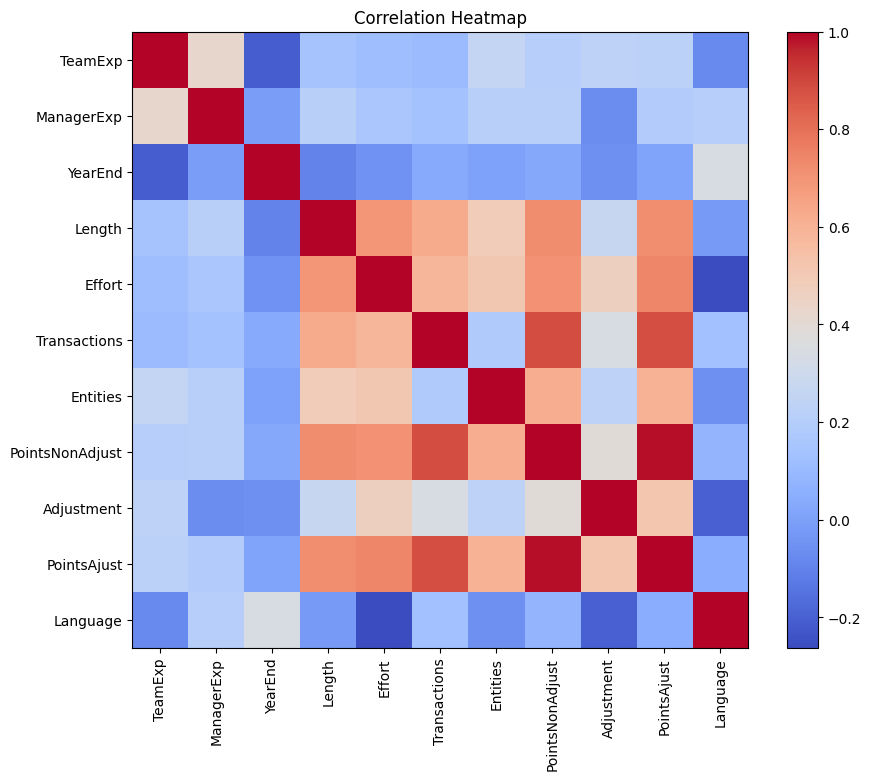

In [11]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


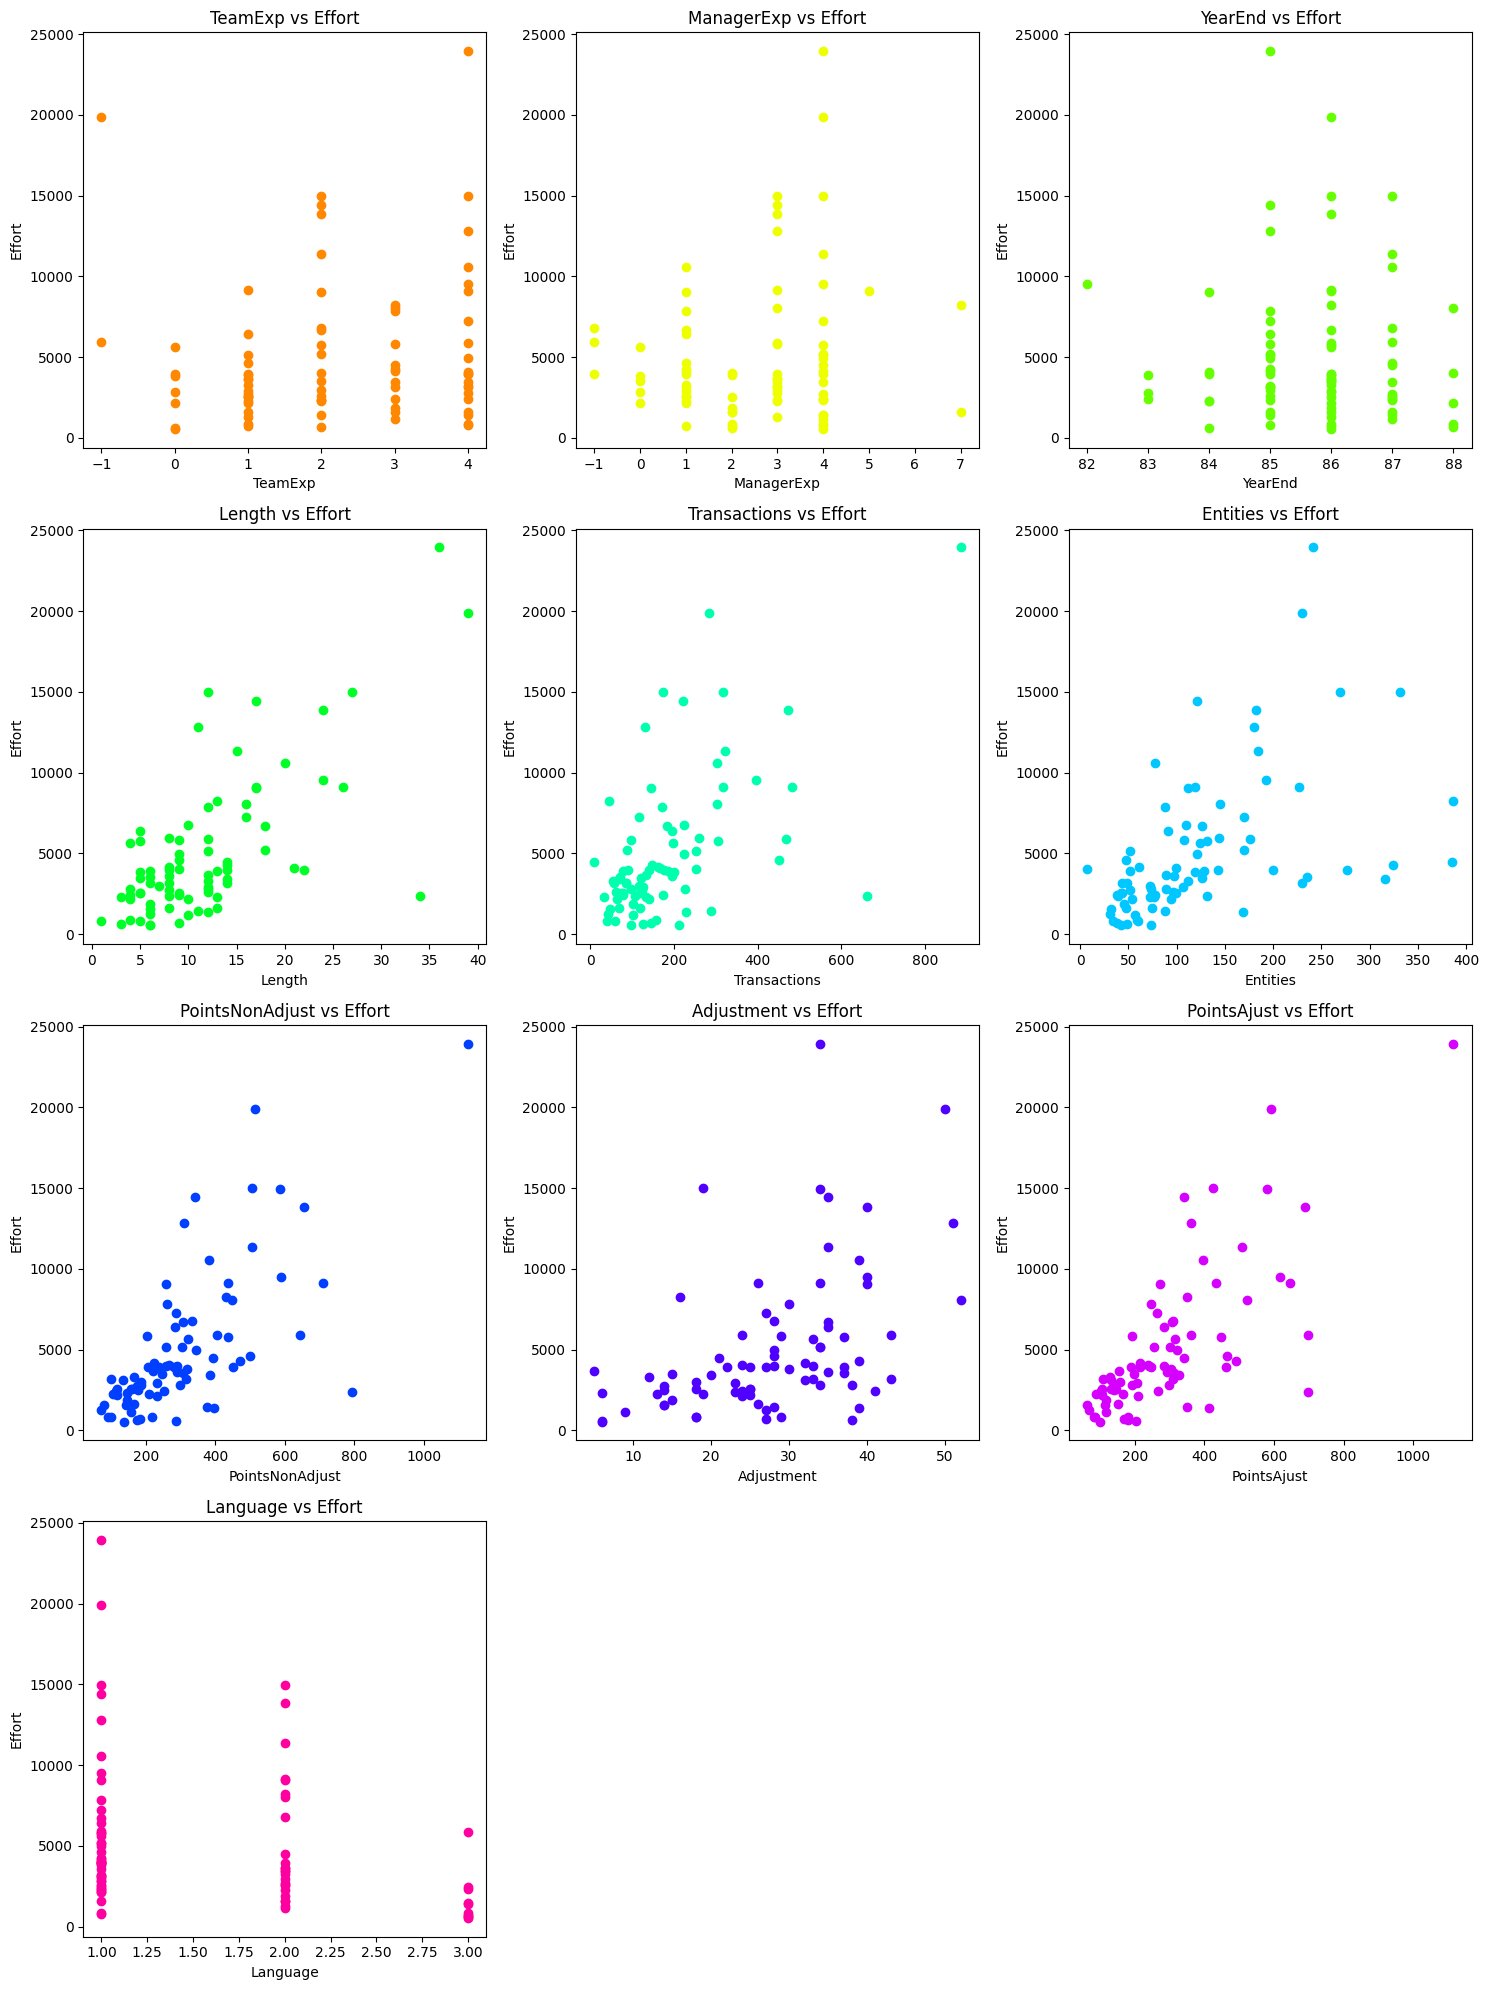

In [12]:
import seaborn as sns
target = "Effort"
features = [col for col in df.columns if col != target]

n = len(features)
rows = (n // 3) + 1
cols = 3

plt.figure(figsize=(15, 5 * rows))
colors = sns.color_palette("hsv", len(features))  

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(df[feature], df[target],color=colors[i])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()


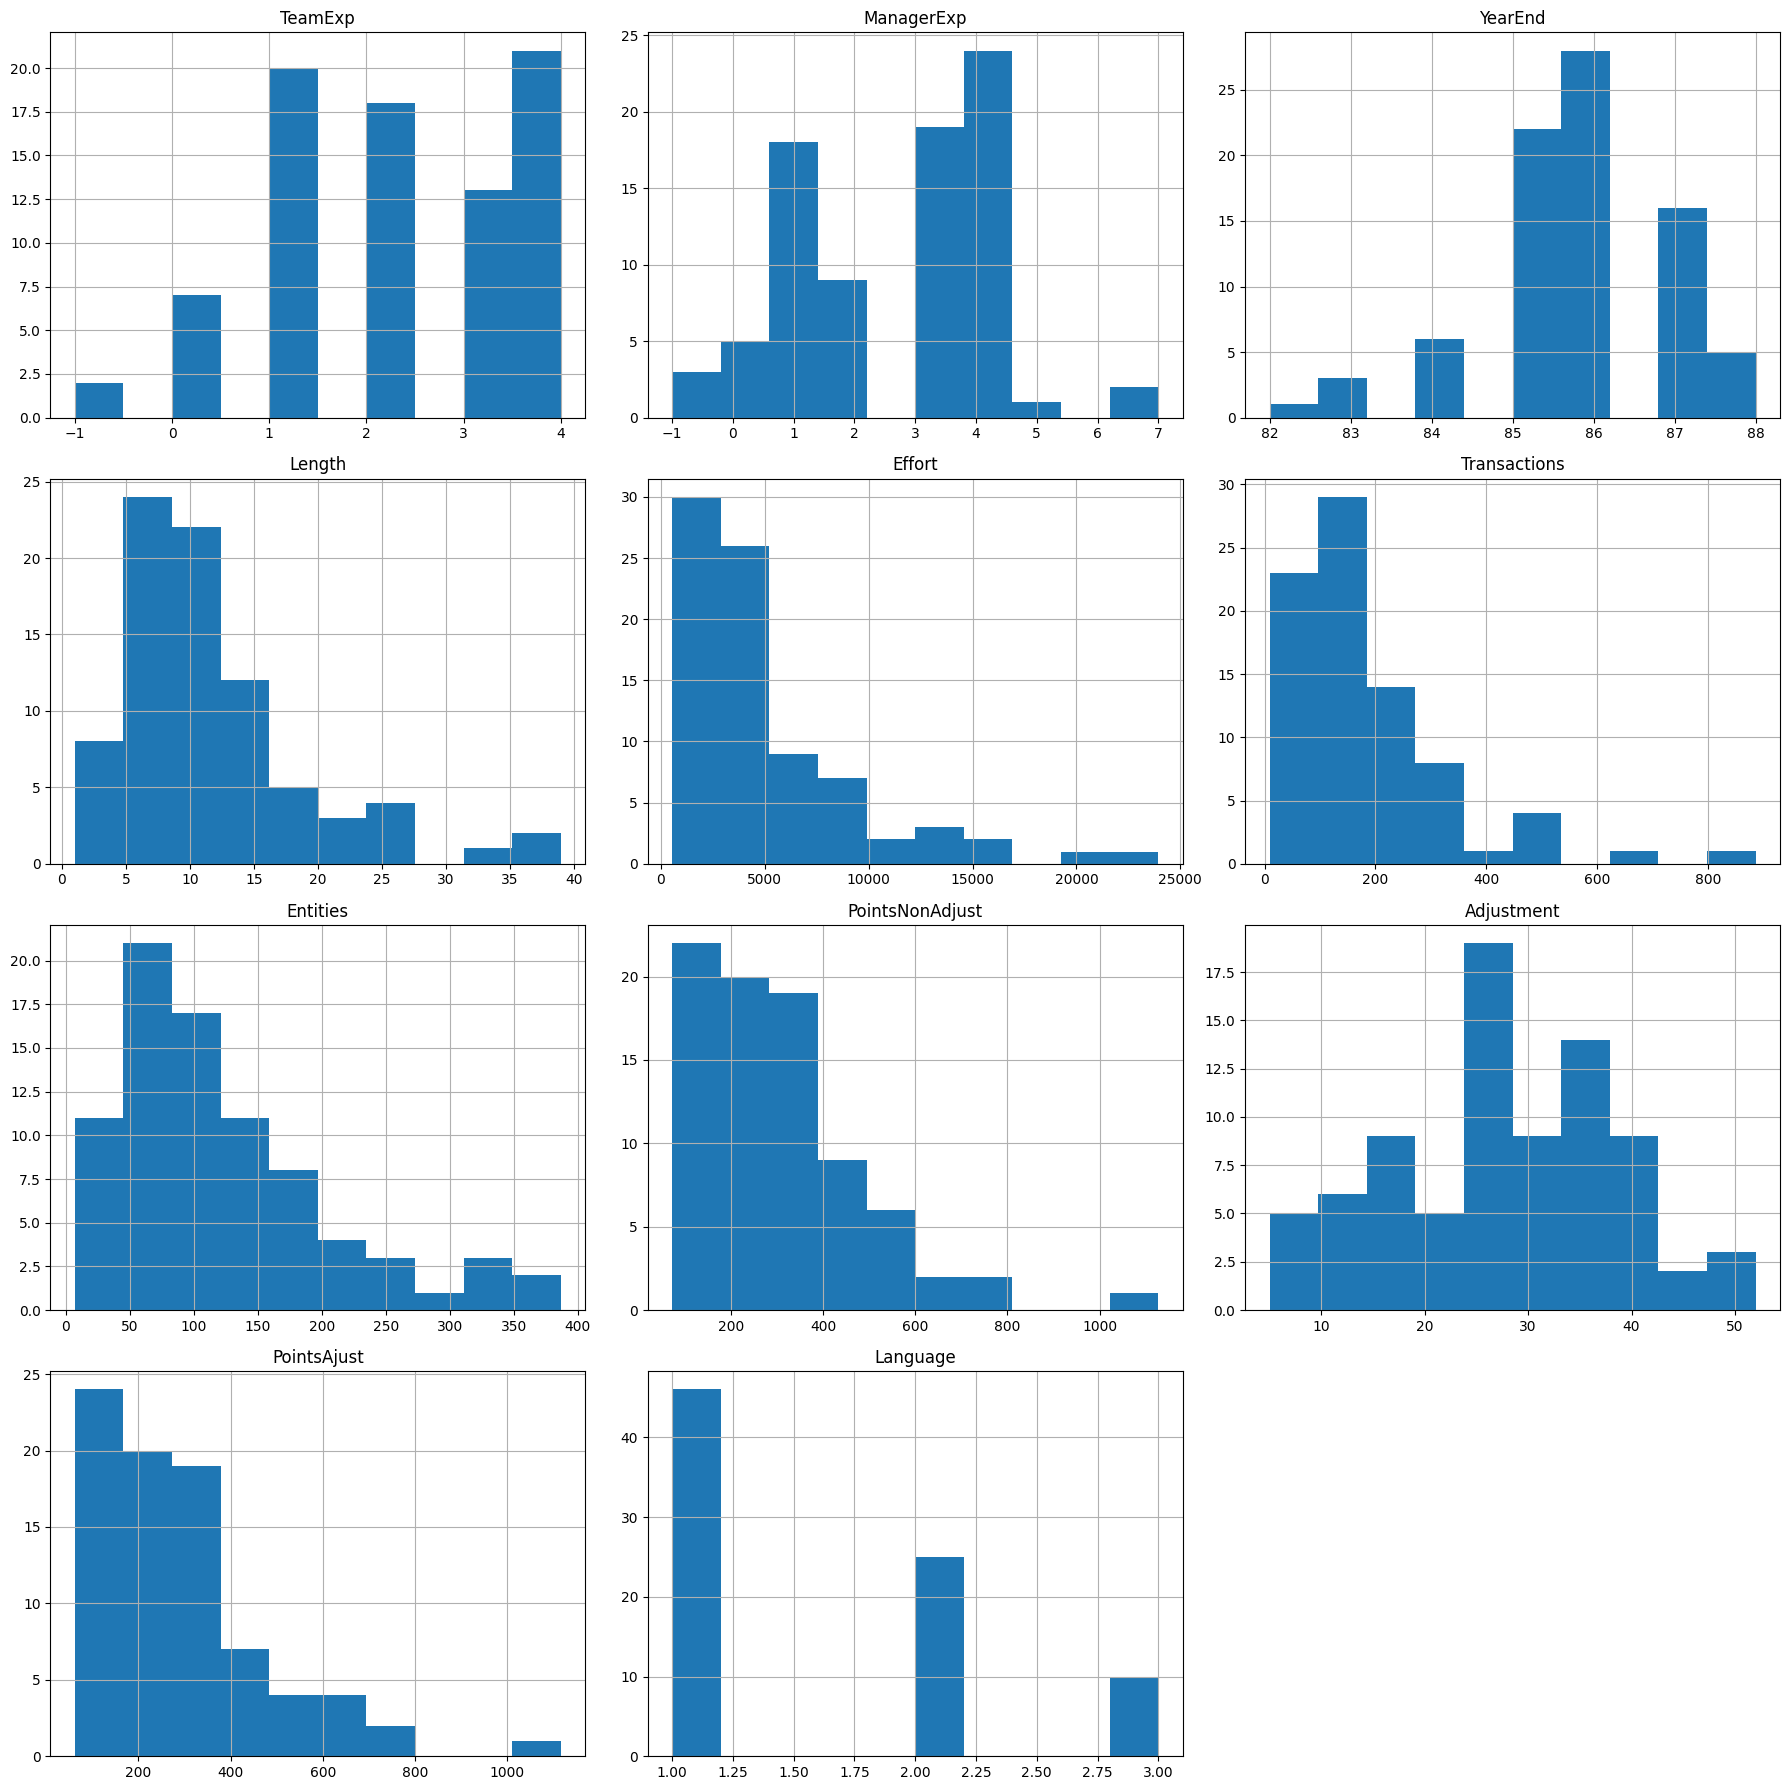

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(18, 18))
plt.tight_layout()
plt.show()

In [14]:
target =[]
for i in df.columns :
    if i =='Effort':
        target.append(i) 
df.columns = df.columns.str.strip() 

In [15]:
x = df.drop(target , axis=1)
y = df[target].values.ravel()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
s = StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

In [26]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge R2:", r2_score(y_test, y_pred))
print("Ridge RMSE:", mean_squared_error(y_test, y_pred))
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

Ridge R2: 0.7608113790516565
Ridge RMSE: 3051748.648477534
0.6965653621567638
0.7608113790516565


In [29]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso))
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

Lasso R2: 0.699315494151211
Lasso RMSE: 3836359.4835907775
0.7148301972180069
0.699315494151211


c:\Users\jam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+07, tolerance: 1.340e+05
  model = cd_fast.enet_coordinate_descent(


In [23]:
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree R2: 0.4590536126000362
Decision Tree RMSE: 6901801.599513243


In [24]:
knn = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': [2, 3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2')
grid_knn.fit(x_train, y_train)

y_pred_knn = grid_knn.predict(x_test)
print("Best kNN params:", grid_knn.best_params_)
print("kNN R2:", r2_score(y_test, y_pred_knn))
print("kNN RMSE:", mean_squared_error(y_test, y_pred_knn))


Best kNN params: {'n_neighbors': 7, 'weights': 'distance'}
kNN R2: 0.5396612460860335
kNN RMSE: 5873348.675738952


In [30]:
svr = SVR()
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf']
}

grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2')
grid_svr.fit(x_train, y_train)

y_pred_svr = grid_svr.predict(x_test)
print("Best SVR params:", grid_svr.best_params_)
print("SVR R2:", r2_score(y_test, y_pred_svr))
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr))


Best SVR params: {'C': 100, 'epsilon': 1, 'kernel': 'linear'}
SVR R2: 0.6158560751582254
SVR RMSE: 4901197.635609595


the best model is Ridge